In [1]:
import numpy as np
import pandas as pd
%load_ext autoreload
%autoreload 2

In [31]:
import os.path
from torch.utils.data import DataLoader
from project_function import SummaryDataSet, split_data, TitlePartyModel, run_n_epochs, plot_losses, TitlePartyModelRelu, SimilarityFilteredSummaryDataSetByLabel, split_data_from_array
import torch

In [3]:
token_data_path = os.path.join(os.getcwd(), "..", "data", "tokenized")

In [4]:
maxpool_train_files, maxpool_validation_files, maxpool_test_files = split_data(token_data_path, "maxpool", 0.6)

validate summary_bill_1811_1392983-maxpool.pkl
validate summary_bill_1811_1392984-maxpool.pkl
train: summary_bill_1811_1392985-maxpool.pkl
test : summary_bill_1811_1392986-maxpool.pkl
train: summary_bill_1811_1392988-maxpool.pkl
train: summary_bill_1811_1392989-maxpool.pkl
test : summary_bill_1811_1392990-maxpool.pkl
test : summary_bill_1811_1392991-maxpool.pkl
train: summary_bill_1811_1392992-maxpool.pkl
train: summary_bill_1811_1392994-maxpool.pkl
train: summary_bill_1811_1392995-maxpool.pkl
train: summary_bill_1811_1392996-maxpool.pkl
train: summary_bill_1811_1392997-maxpool.pkl
train: summary_bill_1811_1393000-maxpool.pkl
test : summary_bill_1811_1393001-maxpool.pkl
train: summary_bill_1811_1393002-maxpool.pkl
train: summary_bill_1811_1393003-maxpool.pkl
train: summary_bill_1811_1393005-maxpool.pkl
train: summary_bill_1811_1393007-maxpool.pkl
test : summary_bill_1811_1393008-maxpool.pkl
train: summary_bill_1811_1393009-maxpool.pkl
validate summary_bill_1811_1393010-maxpool.pkl
trai

In [5]:
print(f'{len(maxpool_train_files)} training files, {len(maxpool_validation_files)} validation files, {len(maxpool_test_files)} test files')

1211 training files, 397 validation files, 379 test files


In [6]:
maxpool_train_dataset = SummaryDataSet(maxpool_train_files, fixed_idx=True, allow_gpu=True, col_name="input_maxpool")
maxpool_validation_dataset = SummaryDataSet(maxpool_validation_files, fixed_idx=True, allow_gpu=True, col_name="input_maxpool")
maxpool_test_dataset = SummaryDataSet(maxpool_test_files, fixed_idx=True, allow_gpu=True, col_name="input_maxpool")

loading C:\Users\benja\git-projects\bitbucket\nlp_legislation_prediction\training\..\data\tokenized\summary_bill_1811_1392985-maxpool.pkl
loading C:\Users\benja\git-projects\bitbucket\nlp_legislation_prediction\training\..\data\tokenized\summary_bill_1811_1392988-maxpool.pkl
loading C:\Users\benja\git-projects\bitbucket\nlp_legislation_prediction\training\..\data\tokenized\summary_bill_1811_1392989-maxpool.pkl
loading C:\Users\benja\git-projects\bitbucket\nlp_legislation_prediction\training\..\data\tokenized\summary_bill_1811_1392992-maxpool.pkl
loading C:\Users\benja\git-projects\bitbucket\nlp_legislation_prediction\training\..\data\tokenized\summary_bill_1811_1392994-maxpool.pkl
loading C:\Users\benja\git-projects\bitbucket\nlp_legislation_prediction\training\..\data\tokenized\summary_bill_1811_1392995-maxpool.pkl
loading C:\Users\benja\git-projects\bitbucket\nlp_legislation_prediction\training\..\data\tokenized\summary_bill_1811_1392996-maxpool.pkl
loading C:\Users\benja\git-project

In [7]:
train_dataloader = DataLoader(maxpool_train_dataset, batch_size=1, shuffle=True)
#validate_dataloader = DataLoader(maxpool_validation_dataset, batch_size=1, shuffle=False)
validate_dataloader = DataLoader(maxpool_train_dataset, batch_size=1, shuffle=False)
test_dataloader = DataLoader(maxpool_train_dataset, batch_size=1, shuffle=False)

In [9]:
num_epochs = 10
maxpool_model = TitlePartyModelRelu()
if torch.cuda.is_available():
    maxpool_model.cuda()
loss_fun_ms3e = torch.nn.MSELoss()
rms_optimizer = torch.optim.RMSprop(maxpool_model.parameters(), lr=0.0001, momentum=0.9)
lrd_schedulers = torch.optim.lr_scheduler.MultiStepLR(rms_optimizer, milestones=range(2,num_epochs,2), gamma=0.95)

In [10]:
torch.autograd.set_detect_anomaly(True)
checkpoint, train_losses, validation_losses, learning_rates = run_n_epochs(num_epochs,
                                                          maxpool_model,
                                                          loss_fun_ms3e,
                                                          rms_optimizer,
                                                          train_dataloader,
                                                          validate_dataloader,
                                                          "maxpool_full",
                                                          lrd_schedulers,
                                                           return_learning_rates=True)

epoch 0
turn on training
running one epoch
tensor([[1., 0., 0., 0.]], device='cuda:0') vs tensor([[0.2342, 0.2565, 0.2541, 0.2551]], device='cuda:0',
       grad_fn=<SoftmaxBackward0>)
last loss = 0.1954600065946579
turn off training
epoch loss 0.1954600065946579
applying model.eval()
LOSS train 0.1954600065946579 valid 0.03818098455667496
stepping scheduler
epoch 1
turn on training
running one epoch
tensor([[1., 0., 0., 0.]], device='cuda:0') vs tensor([[0.6654, 0.0903, 0.0850, 0.1593]], device='cuda:0',
       grad_fn=<SoftmaxBackward0>)
last loss = 0.03818098455667496
turn off training
epoch loss 0.03818098455667496
applying model.eval()
LOSS train 0.03818098455667496 valid 1.2308834507201993e-12
stepping scheduler
epoch 2
turn on training
running one epoch
tensor([[1., 0., 0., 0.]], device='cuda:0') vs tensor([[1.0000e+00, 1.7531e-07, 5.2478e-07, 1.1916e-06]], device='cuda:0',
       grad_fn=<SoftmaxBackward0>)
last loss = 1.2308834507201993e-12
turn off training
epoch loss 1.23088

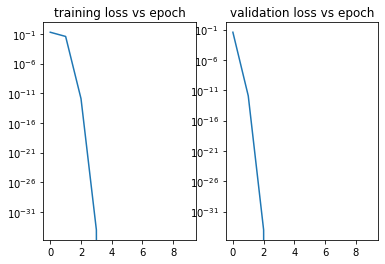

In [11]:
plot_losses(train_losses, validation_losses)

In [12]:
full_maxpool_train_dataset = SummaryDataSet(maxpool_train_files, fixed_idx=False, allow_gpu=True, col_name="input_maxpool")
full_maxpool_validation_dataset = SummaryDataSet(maxpool_validation_files, fixed_idx=False, allow_gpu=True, col_name="input_maxpool")
full_maxpool_test_dataset = SummaryDataSet(maxpool_test_files, fixed_idx=False, allow_gpu=True, col_name="input_maxpool")
fulL_train_dataloader = DataLoader(full_maxpool_train_dataset, batch_size=1, shuffle=True)
full_validate_dataloader = DataLoader(full_maxpool_validation_dataset, batch_size=1, shuffle=False)
full_test_dataloader = DataLoader(full_maxpool_test_dataset, batch_size=1, shuffle=False)

loading C:\Users\benja\git-projects\bitbucket\nlp_legislation_prediction\training\..\data\tokenized\summary_bill_1811_1392985-maxpool.pkl
loading C:\Users\benja\git-projects\bitbucket\nlp_legislation_prediction\training\..\data\tokenized\summary_bill_1811_1392988-maxpool.pkl
loading C:\Users\benja\git-projects\bitbucket\nlp_legislation_prediction\training\..\data\tokenized\summary_bill_1811_1392989-maxpool.pkl
loading C:\Users\benja\git-projects\bitbucket\nlp_legislation_prediction\training\..\data\tokenized\summary_bill_1811_1392992-maxpool.pkl
loading C:\Users\benja\git-projects\bitbucket\nlp_legislation_prediction\training\..\data\tokenized\summary_bill_1811_1392994-maxpool.pkl
loading C:\Users\benja\git-projects\bitbucket\nlp_legislation_prediction\training\..\data\tokenized\summary_bill_1811_1392995-maxpool.pkl
loading C:\Users\benja\git-projects\bitbucket\nlp_legislation_prediction\training\..\data\tokenized\summary_bill_1811_1392996-maxpool.pkl
loading C:\Users\benja\git-project

In [15]:
num_epochs = 20
maxpool_full_model = TitlePartyModelRelu()
if torch.cuda.is_available():
    maxpool_full_model.cuda()
loss_fun_ms3e = torch.nn.MSELoss()
full_rms_optimizer = torch.optim.RMSprop(maxpool_model.parameters(), lr=0.0001, momentum=0.9)
full_lrd_schedulers = torch.optim.lr_scheduler.MultiStepLR(rms_optimizer, milestones=range(2,num_epochs,2), gamma=0.95)

In [16]:
full_checkpoint, full_train_losses, full_validation_losses, learning_rates = run_n_epochs(num_epochs,
                                                          maxpool_full_model,
                                                          loss_fun_ms3e,
                                                          full_rms_optimizer,
                                                          fulL_train_dataloader,
                                                          full_validate_dataloader,
                                                          "maxpool_full",
                                                          full_lrd_schedulers,
                                                          return_learning_rates=True)

epoch 0
turn on training
running one epoch
tensor([[1., 0., 0., 0.]], device='cuda:0') vs tensor([[0.2597, 0.2640, 0.2352, 0.2412]], device='cuda:0',
       grad_fn=<SoftmaxBackward0>)
last loss = 0.1828087866306305
tensor([[0., 0., 0., 1.]], device='cuda:0') vs tensor([[0.2554, 0.2641, 0.2425, 0.2379]], device='cuda:0',
       grad_fn=<SoftmaxBackward0>)
last loss = 0.1936389058828354
tensor([[0., 0., 0., 1.]], device='cuda:0') vs tensor([[0.2565, 0.2682, 0.2341, 0.2412]], device='cuda:0',
       grad_fn=<SoftmaxBackward0>)
last loss = 0.19209115207195282
tensor([[1., 0., 0., 0.]], device='cuda:0') vs tensor([[0.2558, 0.2657, 0.2422, 0.2363]], device='cuda:0',
       grad_fn=<SoftmaxBackward0>)
last loss = 0.18474094569683075
tensor([[0., 0., 0., 1.]], device='cuda:0') vs tensor([[0.2617, 0.2657, 0.2336, 0.2390]], device='cuda:0',
       grad_fn=<SoftmaxBackward0>)
last loss = 0.19317549467086792
tensor([[0., 0., 1., 0.]], device='cuda:0') vs tensor([[0.2594, 0.2642, 0.2391, 0.2373]],

c:\users\benja\git-projects\bitbucket\nlp_legislation_prediction\venvs3\lib\site-packages\torch\optim\lr_scheduler.py:129: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  warnings.warn("Detected call of `lr_scheduler.step()` before `optimizer.step()`. "


tensor([[1., 0., 0., 0.]], device='cuda:0') vs tensor([[0.2639, 0.2615, 0.2403, 0.2343]], device='cuda:0',
       grad_fn=<SoftmaxBackward0>)
last loss = 0.18071292340755463
tensor([[0., 0., 0., 1.]], device='cuda:0') vs tensor([[0.2601, 0.2643, 0.2370, 0.2386]], device='cuda:0',
       grad_fn=<SoftmaxBackward0>)
last loss = 0.19336223602294922
tensor([[1., 0., 0., 0.]], device='cuda:0') vs tensor([[0.2591, 0.2665, 0.2348, 0.2396]], device='cuda:0',
       grad_fn=<SoftmaxBackward0>)
last loss = 0.1831294596195221
tensor([[1., 0., 0., 0.]], device='cuda:0') vs tensor([[0.2597, 0.2657, 0.2357, 0.2389]], device='cuda:0',
       grad_fn=<SoftmaxBackward0>)
last loss = 0.1828232854604721
tensor([[0., 0., 0., 1.]], device='cuda:0') vs tensor([[0.2641, 0.2629, 0.2383, 0.2346]], device='cuda:0',
       grad_fn=<SoftmaxBackward0>)
last loss = 0.19540278613567352
tensor([[1., 0., 0., 0.]], device='cuda:0') vs tensor([[0.2596, 0.2627, 0.2401, 0.2376]], device='cuda:0',
       grad_fn=<SoftmaxBa

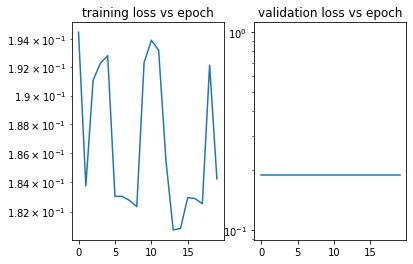

In [17]:
plot_losses(full_train_losses, full_validation_losses)

In [19]:
# let's try limiting to similar input data
filtered_full_train_dataset = SimilarityFilteredSummaryDataSetByLabel(maxpool_train_files, fixed_idx=False, allow_gpu=True, col_name="input_maxpool", similarity_threshold=0.5)
filtered_full_validation_dataset = SimilarityFilteredSummaryDataSetByLabel(maxpool_validation_files, fixed_idx=False, allow_gpu=True, col_name="input_maxpool", similarity_threshold=0.5)
filtered_full_test_dataset = SimilarityFilteredSummaryDataSetByLabel(maxpool_test_files, fixed_idx=False, allow_gpu=True, col_name="input_maxpool", similarity_threshold=0.5)

device set to cuda:0
loading C:\Users\benja\git-projects\bitbucket\nlp_legislation_prediction\training\..\data\tokenized\summary_bill_1811_1392985-maxpool.pkl
loading C:\Users\benja\git-projects\bitbucket\nlp_legislation_prediction\training\..\data\tokenized\summary_bill_1811_1392988-maxpool.pkl
loading C:\Users\benja\git-projects\bitbucket\nlp_legislation_prediction\training\..\data\tokenized\summary_bill_1811_1392989-maxpool.pkl
loading C:\Users\benja\git-projects\bitbucket\nlp_legislation_prediction\training\..\data\tokenized\summary_bill_1811_1392992-maxpool.pkl
loading C:\Users\benja\git-projects\bitbucket\nlp_legislation_prediction\training\..\data\tokenized\summary_bill_1811_1392994-maxpool.pkl
loading C:\Users\benja\git-projects\bitbucket\nlp_legislation_prediction\training\..\data\tokenized\summary_bill_1811_1392995-maxpool.pkl
loading C:\Users\benja\git-projects\bitbucket\nlp_legislation_prediction\training\..\data\tokenized\summary_bill_1811_1392996-maxpool.pkl
loading C:\Us

In [21]:
print(f"filtered training {len(filtered_full_test_dataset)} out of {len(maxpool_train_files)}, validation {len(filtered_full_validation_dataset)} out of {len(maxpool_validation_files)}, test {len(filtered_full_test_dataset)} out of {len(maxpool_test_files)}")

filtered training 324 out of 1211, validation 331 out of 397, test 324 out of 379


In [29]:
# so these have the wrong splits.
# let's try to filter the original files
from sklearn.metrics.pairwise import cosine_similarity
import fnmatch
import pandas as pd
import numpy as np
filtered_files = []
threshold = 0.5
ref_by_label = {}
for root, dirs, files in os.walk(token_data_path):
    for f in files:
        if fnmatch.fnmatch(f, "*maxpool*"):
            df = pd.read_pickle(os.path.join(root, f), compression="gzip")
            label = np.array(df["party"])
            label_index = str(df["party"][0])
            if label_index in ref_by_label:
                ref_array = ref_by_label[label_index]
                dist = cosine_similarity([ref_array], [np.array(df["input_maxpool"])])
                if dist > threshold:
                    filtered_files.append(os.path.join(root, f))
            else:
                filtered_files.append(os.path.join(root, f))
                ref_by_label[label_index] = np.array(df["input_maxpool"])

In [30]:
print(f"filtered files : {len(filtered_files)}")

filtered files : 1630


In [33]:
filtered_train_files, filtered_validation_files, filtered_test_files = split_data_from_array(filtered_files, 0.6)

In [34]:
print(f"split filtered files : train {len(filtered_train_files)}, validation {len(filtered_validation_files)}, test {len(filtered_test_files)}")

split filtered files : train 1000, validation 309, test 321


In [35]:
filtered_train_dataset = SummaryDataSet(filtered_train_files,fixed_idx=False, allow_gpu=True)
filtered_validation_dataset = SummaryDataSet(filtered_validation_files,fixed_idx=False, allow_gpu=True)
filtered_test_dataset = SummaryDataSet(filtered_test_files,fixed_idx=False, allow_gpu=True)
filtered_train_dataloader = DataLoader(filtered_train_dataset, batch_size=1, shuffle=True)
filtered_validation_dataloader = DataLoader(filtered_validation_dataset, batch_size=1, shuffle=False)
filtered_test_dataloader = DataLoader(filtered_test_dataset, batch_size=1, shuffle=False)

loading C:\Users\benja\git-projects\bitbucket\nlp_legislation_prediction\training\..\data\tokenized\summary_bill_1811_1392984-maxpool.pkl
loading C:\Users\benja\git-projects\bitbucket\nlp_legislation_prediction\training\..\data\tokenized\summary_bill_1811_1392985-maxpool.pkl
loading C:\Users\benja\git-projects\bitbucket\nlp_legislation_prediction\training\..\data\tokenized\summary_bill_1811_1392986-maxpool.pkl
loading C:\Users\benja\git-projects\bitbucket\nlp_legislation_prediction\training\..\data\tokenized\summary_bill_1811_1392988-maxpool.pkl
loading C:\Users\benja\git-projects\bitbucket\nlp_legislation_prediction\training\..\data\tokenized\summary_bill_1811_1392991-maxpool.pkl
loading C:\Users\benja\git-projects\bitbucket\nlp_legislation_prediction\training\..\data\tokenized\summary_bill_1811_1392992-maxpool.pkl
loading C:\Users\benja\git-projects\bitbucket\nlp_legislation_prediction\training\..\data\tokenized\summary_bill_1811_1392995-maxpool.pkl
loading C:\Users\benja\git-project

In [40]:
# set the model
filtered_full_relu_model = TitlePartyModelRelu()
if torch.cuda.is_available():
    filtered_full_relu_model.cuda()


In [41]:
num_epochs = 50
filtered_relu_loss_fun_ms3e = torch.nn.MSELoss()
filtered_relu_full_rms_optimizer = torch.optim.RMSprop(filtered_full_relu_model.parameters(), lr=0.001, momentum=0.9)
filtered_relu_full_lrd_schedulers = torch.optim.lr_scheduler.MultiStepLR(filtered_relu_full_rms_optimizer, milestones=range(2, num_epochs, 2),
                                                           gamma=0.95)

In [42]:
filtered_full_checkpoint, filtered_full_train_losses, filtered_full_validation_losses, filtered_learning_rates = run_n_epochs(num_epochs,
                                                          maxpool_full_model,
                                                          loss_fun_ms3e,
                                                          full_rms_optimizer,
                                                          fulL_train_dataloader,
                                                          full_validate_dataloader,
                                                          "filtered_maxpool_full",
                                                          full_lrd_schedulers,
                                                          return_learning_rates=True)

epoch 0
turn on training
running one epoch
tensor([[0., 0., 0., 1.]], device='cuda:0') vs tensor([[0.2591, 0.2600, 0.2374, 0.2435]], device='cuda:0',
       grad_fn=<SoftmaxBackward0>)
last loss = 0.1908394694328308
tensor([[0., 0., 1., 0.]], device='cuda:0') vs tensor([[0.2584, 0.2657, 0.2375, 0.2384]], device='cuda:0',
       grad_fn=<SoftmaxBackward0>)
last loss = 0.1938854455947876
tensor([[0., 0., 1., 0.]], device='cuda:0') vs tensor([[0.2588, 0.2619, 0.2397, 0.2396]], device='cuda:0',
       grad_fn=<SoftmaxBackward0>)
last loss = 0.19274777173995972
tensor([[1., 0., 0., 0.]], device='cuda:0') vs tensor([[0.2638, 0.2584, 0.2390, 0.2388]], device='cuda:0',
       grad_fn=<SoftmaxBackward0>)
last loss = 0.18072383105754852
tensor([[0., 0., 0., 1.]], device='cuda:0') vs tensor([[0.2610, 0.2634, 0.2394, 0.2363]], device='cuda:0',
       grad_fn=<SoftmaxBackward0>)
last loss = 0.19452013075351715
tensor([[1., 0., 0., 0.]], device='cuda:0') vs tensor([[0.2604, 0.2622, 0.2411, 0.2363]],

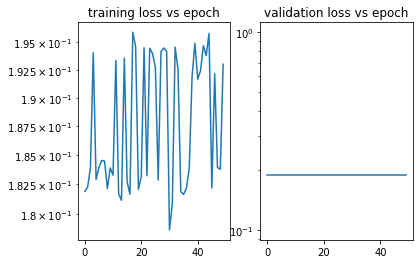

In [43]:
plot_losses(filtered_full_train_losses, filtered_full_validation_losses)

In [47]:
a = np.array([1,0,0])
b = np.array([1,0,0])
d = cosine_similarity([a],[b])
d
c = np.array([0,1,0])
d2 = cosine_similarity([a],[c])
d2

array([[0.]])

In [53]:
t_df = []
for d, l in filtered_train_dataset:
    t_df.append(np.array(d.cpu()))
print(len(t_df))

1000


In [54]:
t_cosine_similarity = cosine_similarity(t_df)

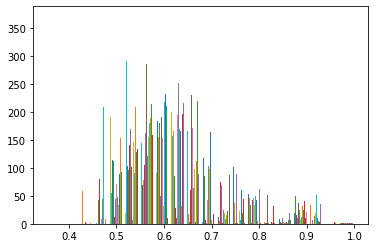

In [56]:
import matplotlib.pyplot as plt
plt.hist(t_cosine_similarity, bins=20)
plt.show()

In [57]:
filtered_files_60 = []
threshold = 0.6
ref_by_label = {}
for root, dirs, files in os.walk(token_data_path):
    for f in files:
        if fnmatch.fnmatch(f, "*maxpool*"):
            df = pd.read_pickle(os.path.join(root, f), compression="gzip")
            label = np.array(df["party"])
            label_index = str(df["party"][0])
            if label_index in ref_by_label:
                ref_array = ref_by_label[label_index]
                dist = cosine_similarity([ref_array], [np.array(df["input_maxpool"])])
                if dist > threshold:
                    filtered_files_60.append(os.path.join(root, f))
            else:
                filtered_files_60.append(os.path.join(root, f))
                ref_by_label[label_index] = np.array(df["input_maxpool"])

In [58]:
print(f"filtered files : {len(filtered_files_60)}")

filtered files : 638


In [59]:
filtered_train_files_60, filtered_validation_files_60, filtered_test_files_60 = split_data_from_array(filtered_files_60, 0.6)

In [61]:
print(f"split filtered files : train {len(filtered_train_files_60)}, validation {len(filtered_validation_files_60)}, test {len(filtered_test_files_60)}")

split filtered files : train 379, validation 139, test 120


In [62]:
filtered_60_train_dataset = SummaryDataSet(filtered_train_files_60,fixed_idx=False, allow_gpu=True)
filtered_60_validation_dataset = SummaryDataSet(filtered_validation_files_60,fixed_idx=False, allow_gpu=True)
filtered_60_test_dataset = SummaryDataSet(filtered_test_files_60,fixed_idx=False, allow_gpu=True)
filtered_60_train_dataloader = DataLoader(filtered_60_train_dataset, batch_size=1, shuffle=True)
filtered_60_validation_dataloader = DataLoader(filtered_60_validation_dataset, batch_size=1, shuffle=False)
filtered_60_test_dataloader = DataLoader(filtered_60_test_dataset, batch_size=1, shuffle=False)

loading C:\Users\benja\git-projects\bitbucket\nlp_legislation_prediction\training\..\data\tokenized\summary_bill_1811_1392988-maxpool.pkl
loading C:\Users\benja\git-projects\bitbucket\nlp_legislation_prediction\training\..\data\tokenized\summary_bill_1811_1392989-maxpool.pkl
loading C:\Users\benja\git-projects\bitbucket\nlp_legislation_prediction\training\..\data\tokenized\summary_bill_1811_1393000-maxpool.pkl
loading C:\Users\benja\git-projects\bitbucket\nlp_legislation_prediction\training\..\data\tokenized\summary_bill_1811_1393003-maxpool.pkl
loading C:\Users\benja\git-projects\bitbucket\nlp_legislation_prediction\training\..\data\tokenized\summary_bill_1811_1393010-maxpool.pkl
loading C:\Users\benja\git-projects\bitbucket\nlp_legislation_prediction\training\..\data\tokenized\summary_bill_1811_1393019-maxpool.pkl
loading C:\Users\benja\git-projects\bitbucket\nlp_legislation_prediction\training\..\data\tokenized\summary_bill_1811_1393020-maxpool.pkl
loading C:\Users\benja\git-project

In [63]:
t_df = []
for d, l in filtered_60_train_dataset:
    t_df.append(np.array(d.cpu()))
print(len(t_df))

379


In [64]:
t_cosine_similarity = cosine_similarity(t_df)

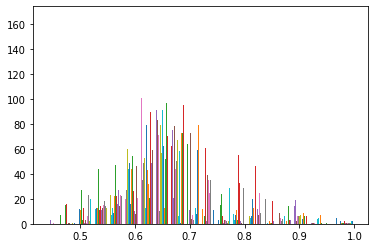

In [65]:
import matplotlib.pyplot as plt
plt.hist(t_cosine_similarity, bins=20)
plt.show()

In [70]:
filtered_60_full_relu_model = TitlePartyModelRelu()
if torch.cuda.is_available():
    filtered_60_full_relu_model.cuda()

In [67]:
num_epochs = 20
filtered_60_relu_loss_fun_ms3e = torch.nn.MSELoss()
filtered_60_relu_full_rms_optimizer = torch.optim.RMSprop(filtered_60_full_relu_model.parameters(), lr=0.001, momentum=0.9)
filtered_60_relu_full_lrd_schedulers = torch.optim.lr_scheduler.MultiStepLR(filtered_60_relu_full_rms_optimizer, milestones=range(2, num_epochs, 2))

In [68]:
filtered_60_full_checkpoint, filtered_60_full_train_losses, filtered_60_full_validation_losses, filtered_60_learning_rates = run_n_epochs(num_epochs,
                                                          filtered_60_full_relu_model,
                                                          filtered_60_relu_loss_fun_ms3e,
                                                          filtered_60_relu_full_rms_optimizer,
                                                          filtered_60_train_dataloader,
                                                          filtered_60_validation_dataloader,
                                                          "filtered_60_maxpool_full",
                                                          filtered_60_relu_full_lrd_schedulers,
                                                          return_learning_rates=True)

epoch 0
turn on training
running one epoch
tensor([[0., 0., 1., 0.]], device='cuda:0') vs tensor([[0.2578, 0.2599, 0.2505, 0.2318]], device='cuda:0',
       grad_fn=<SoftmaxBackward0>)
last loss = 0.18738871812820435
tensor([[0., 0., 1., 0.]], device='cuda:0') vs tensor([[0., 0., 1., 0.]], device='cuda:0', grad_fn=<SoftmaxBackward0>)
last loss = 0.0
tensor([[1., 0., 0., 0.]], device='cuda:0') vs tensor([[0., 0., 1., 0.]], device='cuda:0', grad_fn=<SoftmaxBackward0>)
last loss = 0.5
tensor([[1., 0., 0., 0.]], device='cuda:0') vs tensor([[0., 0., 1., 0.]], device='cuda:0', grad_fn=<SoftmaxBackward0>)
last loss = 0.5
turn off training
epoch loss 0.5
applying model.eval()
LOSS train 0.5 valid 0.32374101877212524
stepping scheduler
epoch 1
turn on training
running one epoch
tensor([[0., 0., 1., 0.]], device='cuda:0') vs tensor([[0., 0., 1., 0.]], device='cuda:0', grad_fn=<SoftmaxBackward0>)
last loss = 0.0
tensor([[1., 0., 0., 0.]], device='cuda:0') vs tensor([[0., 0., 1., 0.]], device='cud

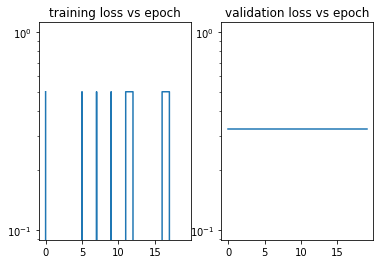

In [69]:
plot_losses(filtered_60_full_train_losses, filtered_60_full_validation_losses)

In [78]:
num_epochs = 20
weight_tensor = torch.tensor(np.ones(4)/4, dtype=float, device=filtered_60_train_dataset.t_device)
filtered_60_relu_loss_fun_cel = torch.nn.CrossEntropyLoss(weight_tensor)
filtered_60_relu_full_rms_optimizer = torch.optim.RMSprop(filtered_60_full_relu_model.parameters(), lr=0.001, momentum=0.9)
filtered_60_relu_full_lrd_schedulers = torch.optim.lr_scheduler.MultiStepLR(filtered_60_relu_full_rms_optimizer, milestones=range(2, num_epochs, 2))

In [79]:
filtered_60_full_checkpoint, filtered_60_full_train_losses, filtered_60_full_validation_losses, filtered_60_learning_rates = run_n_epochs(num_epochs,
                                                          filtered_60_full_relu_model,
                                                          filtered_60_relu_loss_fun_cel,
                                                          filtered_60_relu_full_rms_optimizer,
                                                          filtered_60_train_dataloader,
                                                          filtered_60_validation_dataloader,
                                                          "filtered_60_maxpool_full_cel",
                                                          filtered_60_relu_full_lrd_schedulers,
                                                          return_learning_rates=True)

epoch 0
turn on training
running one epoch
tensor([[0., 0., 1., 0.]], device='cuda:0') vs tensor([[0.2326, 0.2638, 0.2703, 0.2334]], device='cuda:0',
       grad_fn=<SoftmaxBackward0>)
last loss = 0.3415374755859375
tensor([[1., 0., 0., 0.]], device='cuda:0') vs tensor([[0., 0., 1., 0.]], device='cuda:0', grad_fn=<SoftmaxBackward0>)
last loss = 0.43591710925102234
tensor([[1., 0., 0., 0.]], device='cuda:0') vs tensor([[0., 0., 1., 0.]], device='cuda:0', grad_fn=<SoftmaxBackward0>)
last loss = 0.43591710925102234
tensor([[0., 0., 1., 0.]], device='cuda:0') vs tensor([[0., 0., 1., 0.]], device='cuda:0', grad_fn=<SoftmaxBackward0>)
last loss = 0.18591710925102234
turn off training
epoch loss 0.43591710925102234
applying model.eval()
LOSS train 0.43591710925102234 valid 0.34778761284814463
stepping scheduler
epoch 1
turn on training
running one epoch
tensor([[0., 0., 1., 0.]], device='cuda:0') vs tensor([[0., 0., 1., 0.]], device='cuda:0', grad_fn=<SoftmaxBackward0>)
last loss = 0.18591710

In [80]:
# collapse the labels, remove index = 2
filtered_60_col_train_dataset = SummaryDataSet(filtered_train_files_60,fixed_idx=False, allow_gpu=True, collapse_label=True, remove_index=2)
filtered_60_col_validation_dataset = SummaryDataSet(filtered_validation_files_60,fixed_idx=False, allow_gpu=True, collapse_label=True, remove_index=2)
filtered_60_col_test_dataset = SummaryDataSet(filtered_test_files_60,fixed_idx=False, allow_gpu=True, collapse_label=True, remove_index=2)
filtered_60_col_train_dataloader = DataLoader(filtered_60_col_train_dataset, batch_size=1, shuffle=True)
filtered_60_col_validation_dataloader = DataLoader(filtered_60_col_validation_dataset, batch_size=1, shuffle=False)
filtered_60_col_test_dataloader = DataLoader(filtered_60_col_test_dataset, batch_size=1, shuffle=False)

loading C:\Users\benja\git-projects\bitbucket\nlp_legislation_prediction\training\..\data\tokenized\summary_bill_1811_1392988-maxpool.pkl
loading C:\Users\benja\git-projects\bitbucket\nlp_legislation_prediction\training\..\data\tokenized\summary_bill_1811_1392989-maxpool.pkl
loading C:\Users\benja\git-projects\bitbucket\nlp_legislation_prediction\training\..\data\tokenized\summary_bill_1811_1393000-maxpool.pkl
loading C:\Users\benja\git-projects\bitbucket\nlp_legislation_prediction\training\..\data\tokenized\summary_bill_1811_1393003-maxpool.pkl
loading C:\Users\benja\git-projects\bitbucket\nlp_legislation_prediction\training\..\data\tokenized\summary_bill_1811_1393010-maxpool.pkl
loading C:\Users\benja\git-projects\bitbucket\nlp_legislation_prediction\training\..\data\tokenized\summary_bill_1811_1393019-maxpool.pkl
loading C:\Users\benja\git-projects\bitbucket\nlp_legislation_prediction\training\..\data\tokenized\summary_bill_1811_1393020-maxpool.pkl
loading C:\Users\benja\git-project

In [81]:
for d, l in filtered_60_col_train_dataset:
    print(l)

tensor([0., 0., 0.], device='cuda:0')
tensor([0., 0., 0.], device='cuda:0')
tensor([0., 0., 0.], device='cuda:0')
tensor([1., 0., 0.], device='cuda:0')
tensor([0., 0., 0.], device='cuda:0')
tensor([0., 0., 0.], device='cuda:0')
tensor([1., 0., 0.], device='cuda:0')
tensor([1., 0., 0.], device='cuda:0')
tensor([1., 0., 0.], device='cuda:0')
tensor([0., 0., 1.], device='cuda:0')
tensor([0., 0., 0.], device='cuda:0')
tensor([1., 0., 0.], device='cuda:0')
tensor([0., 0., 0.], device='cuda:0')
tensor([0., 0., 1.], device='cuda:0')
tensor([1., 0., 0.], device='cuda:0')
tensor([1., 0., 0.], device='cuda:0')
tensor([1., 0., 0.], device='cuda:0')
tensor([0., 0., 1.], device='cuda:0')
tensor([0., 0., 0.], device='cuda:0')
tensor([0., 0., 0.], device='cuda:0')
tensor([0., 0., 0.], device='cuda:0')
tensor([1., 0., 0.], device='cuda:0')
tensor([1., 0., 0.], device='cuda:0')
tensor([0., 0., 0.], device='cuda:0')
tensor([0., 0., 0.], device='cuda:0')
tensor([0., 0., 0.], device='cuda:0')
tensor([1., 

In [109]:
from project_function import TitlePartyModelReluCollapse
filtered_60_col_full_relu_model = TitlePartyModelReluCollapse(3)
if torch.cuda.is_available():
    filtered_60_col_full_relu_model.cuda()

In [110]:
num_epochs = 20
weight_tensor_col = torch.tensor(np.ones(3)/3, dtype=float, device=filtered_60_train_dataset.t_device)
filtered_60_col_relu_loss_fun_cel = torch.nn.CrossEntropyLoss(weight_tensor_col)
filtered_60_col_relu_full_rms_optimizer = torch.optim.RMSprop(filtered_60_col_full_relu_model.parameters(), lr=0.001, momentum=0.9)
filtered_60_col_relu_full_lrd_schedulers = torch.optim.lr_scheduler.MultiStepLR(filtered_60_col_relu_full_rms_optimizer, milestones=range(2, num_epochs, 2))

In [111]:
filtered_60_col_full_checkpoint, filtered_60_col_full_train_losses, filtered_60_col_full_validation_losses, filtered_60_col_learning_rates = run_n_epochs(num_epochs,
                                                          filtered_60_col_full_relu_model,
                                                          filtered_60_col_relu_loss_fun_cel,
                                                          filtered_60_col_relu_full_rms_optimizer,
                                                          filtered_60_col_train_dataloader,
                                                          filtered_60_col_validation_dataloader,
                                                          "filtered_60_maxpool_full_cel",
                                                          filtered_60_col_relu_full_lrd_schedulers,
                                                          return_learning_rates=True)

epoch 0
turn on training
running one epoch
tensor([[1., 0., 0.]], device='cuda:0') vs tensor([[0.3269, 0.3342, 0.3389]], device='cuda:0', grad_fn=<SoftmaxBackward0>)
last loss = 0.36836357911427814
tensor([[1., 0., 0.]], device='cuda:0') vs tensor([[1., 0., 0.]], device='cuda:0', grad_fn=<SoftmaxBackward0>)
last loss = 0.18381492296854654
tensor([[1., 0., 0.]], device='cuda:0') vs tensor([[1., 0., 0.]], device='cuda:0', grad_fn=<SoftmaxBackward0>)
last loss = 0.18381492296854654
tensor([[1., 0., 0.]], device='cuda:0') vs tensor([[1., 0., 0.]], device='cuda:0', grad_fn=<SoftmaxBackward0>)
last loss = 0.18381492296854654
turn off training
epoch loss -0.0
applying model.eval()
LOSS train -0.0 valid 0.176570813432872
stepping scheduler
epoch 1
turn on training
running one epoch
tensor([[1., 0., 0.]], device='cuda:0') vs tensor([[1., 0., 0.]], device='cuda:0', grad_fn=<SoftmaxBackward0>)
last loss = 0.18381492296854654
tensor([[1., 0., 0.]], device='cuda:0') vs tensor([[1., 0., 0.]], device

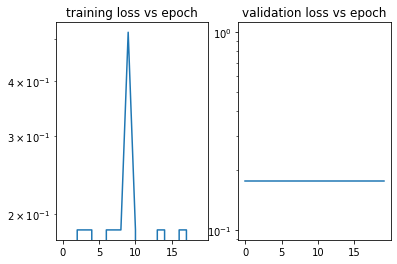

In [112]:
plot_losses(filtered_60_col_full_train_losses, filtered_60_col_full_validation_losses)

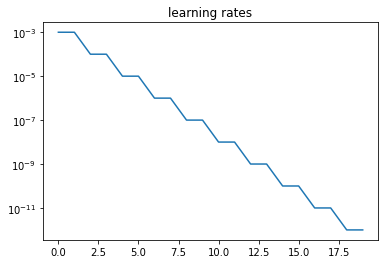

In [113]:
plt.plot(filtered_60_col_learning_rates)
plt.title("learning rates")
plt.yscale("log")
plt.show()

In [106]:
filtered_60_col_learning_rates

[[0.001], [0.001], [0.0001], [0.0001]]